In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('ai4i2020.csv')

In [11]:
df.shape

(10000, 14)

In [3]:
# Displaying basic info and first rows
dataset_info = df.info()
dataset_head = df.head()

dataset_info, dataset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

(None,
    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
 0    1     M14860    M                298.1                    308.6   
 1    2     L47181    L                298.2                    308.7   
 2    3     L47182    L                298.1                    308.5   
 3    4     L47183    L                298.2                    308.6   
 4    5     L47184    L                298.2                    308.7   
 
    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
 0                    1551         42.8                0                0    0   
 1                    1408         46.3                3                0    0   
 2                    1498         49.4                5                0    0   
 3                    1433         39.5                7                0    0   
 4                    1408         40.0                9                0    0   
 
    HDF  PWF  OSF  RNF  
 0    0    0    0    0  
 1    0  

In [4]:
# Checking for missing values
missing_values=df.isnull().sum()
missing_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:

# Basic statistics to understand the data
desc_stats=df.describe()
desc_stats


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
df["Product ID"].nunique()

10000

In [13]:
df.drop("Product ID",axis=1,inplace=True)

In [17]:
df.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [14]:
# Distribution of machine failure to understand class imbalance
failure_counts = df['Machine failure'].value_counts(normalize=True)
failure_counts

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64


BOX PLOTS


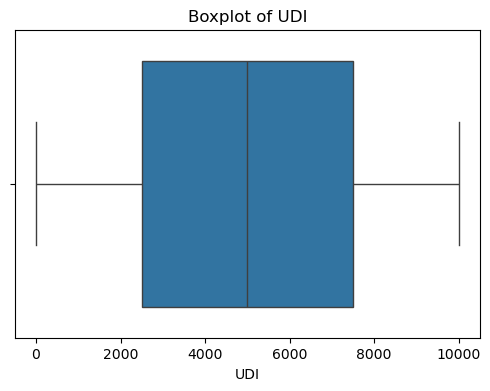

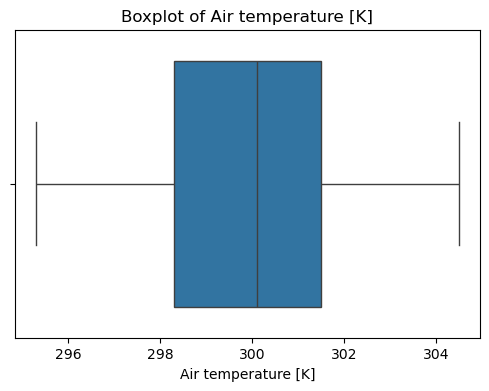

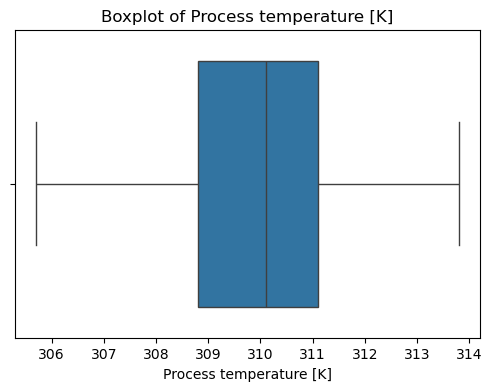

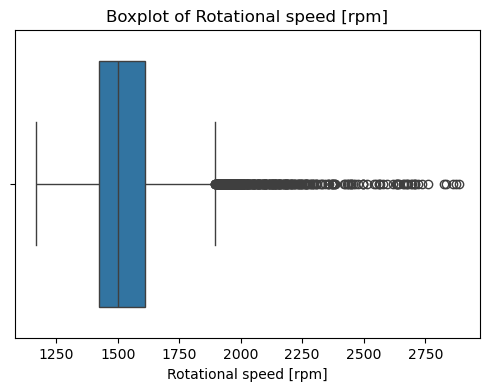

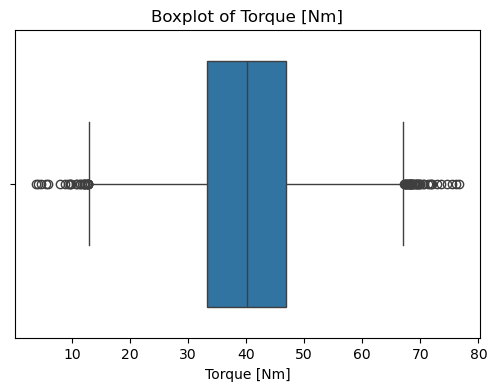

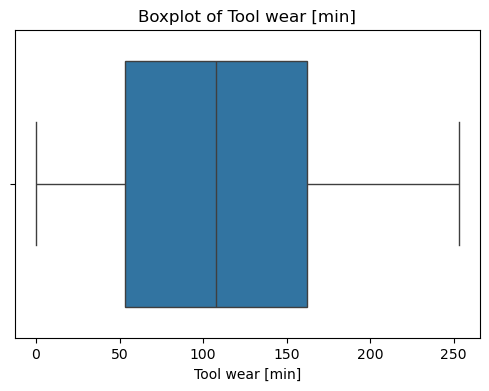

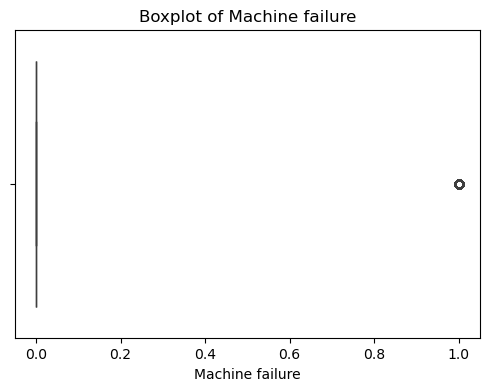

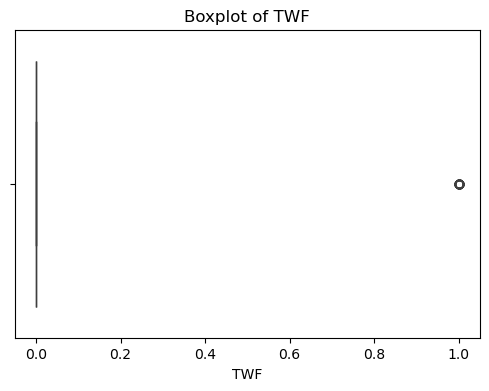

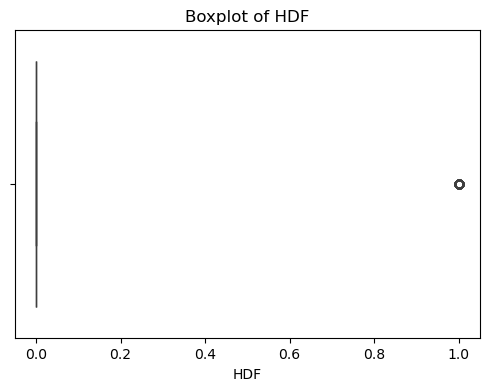

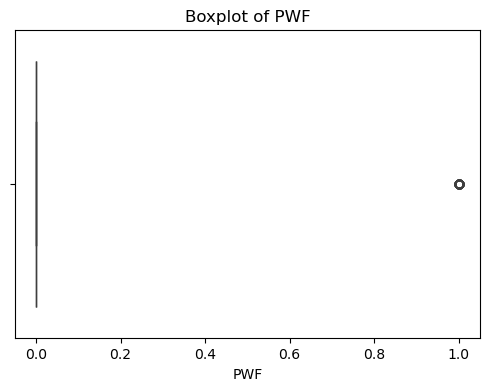

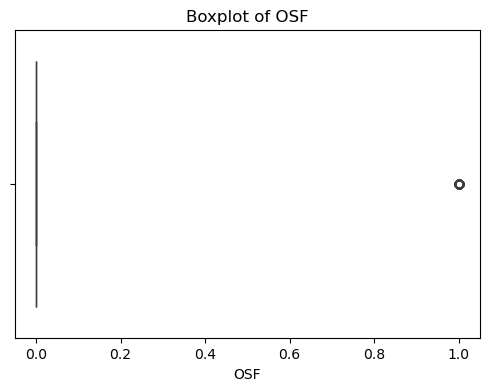

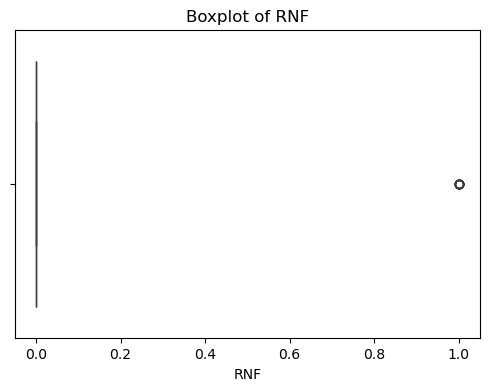

In [15]:
print("\n" + "="*40)
print("BOX PLOTS")
print("="*40)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [16]:
print("\n" + "="*40)
print("Outlier Percentage")
print("="*40)
df_copy = df.copy()
cols = ["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]
for col in cols:
    if df[col].dtype != 'O':
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        ratio = len(outliers) / len(df)
        print(ratio)


Outlier Percentage
0.0
0.0
0.0418
0.0069
0.0


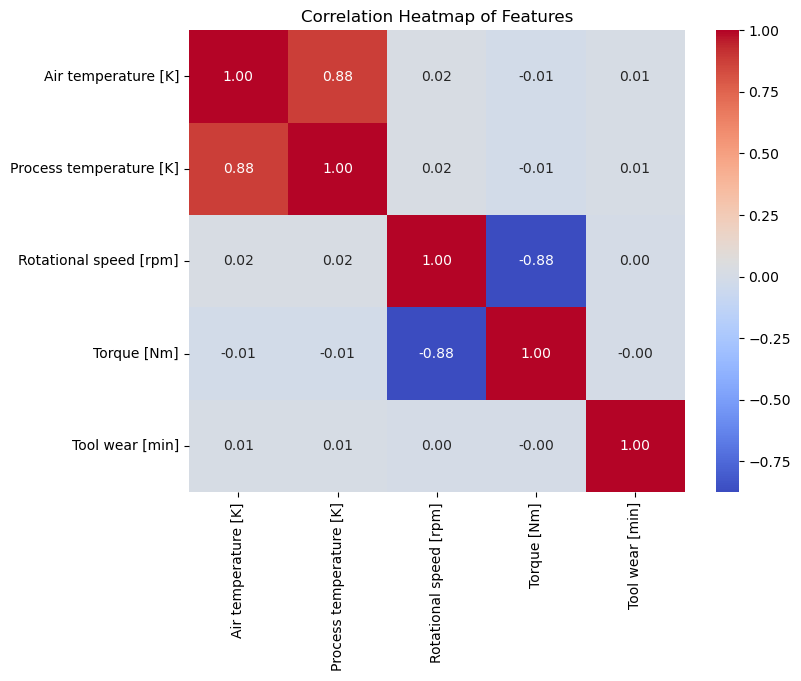

In [19]:
drop_cols = ["UDI", "Type", 
             "Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"]

feature_df = df.drop(columns=drop_cols)

# Compute correlation matrix
corr = feature_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

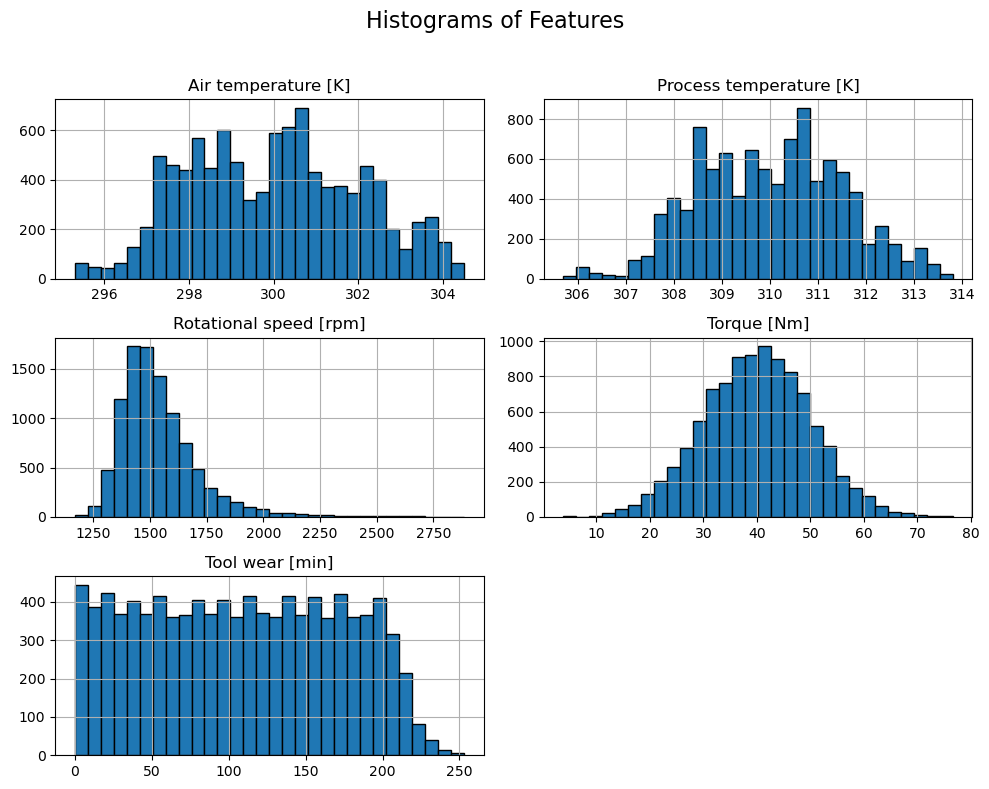

In [20]:
feature_df.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2376\2177287684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set2")


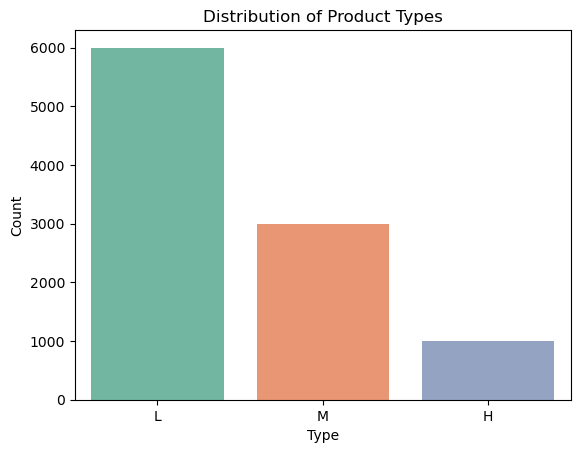

In [27]:
type_counts = df["Type"].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set2")
plt.ylabel("Count")
plt.title("Distribution of Product Types")
plt.show()

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    H           299.866999               309.925723             1538.147557   
1    L           300.015833               310.012300             1539.469167   
2    M           300.029263               310.018785             1537.598932   

   Torque [Nm]  Tool wear [min]  
0    39.838285       107.419741  
1    39.996600       108.378833  
2    40.017251       107.272272  


C:\Users\Dell\AppData\Local\Temp\ipykernel_2376\279444039.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type", y=col, data=type_means, palette="Set2")
C:\Users\Dell\AppData\Local\Temp\ipykernel_2376\279444039.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type", y=col, data=type_means, palette="Set2")
C:\Users\Dell\AppData\Local\Temp\ipykernel_2376\279444039.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type", y=col, data=type_means, palette="Set2")
C:\Users\Dell\AppData\Local\Temp\ipykernel_2376\279444039.py:11:

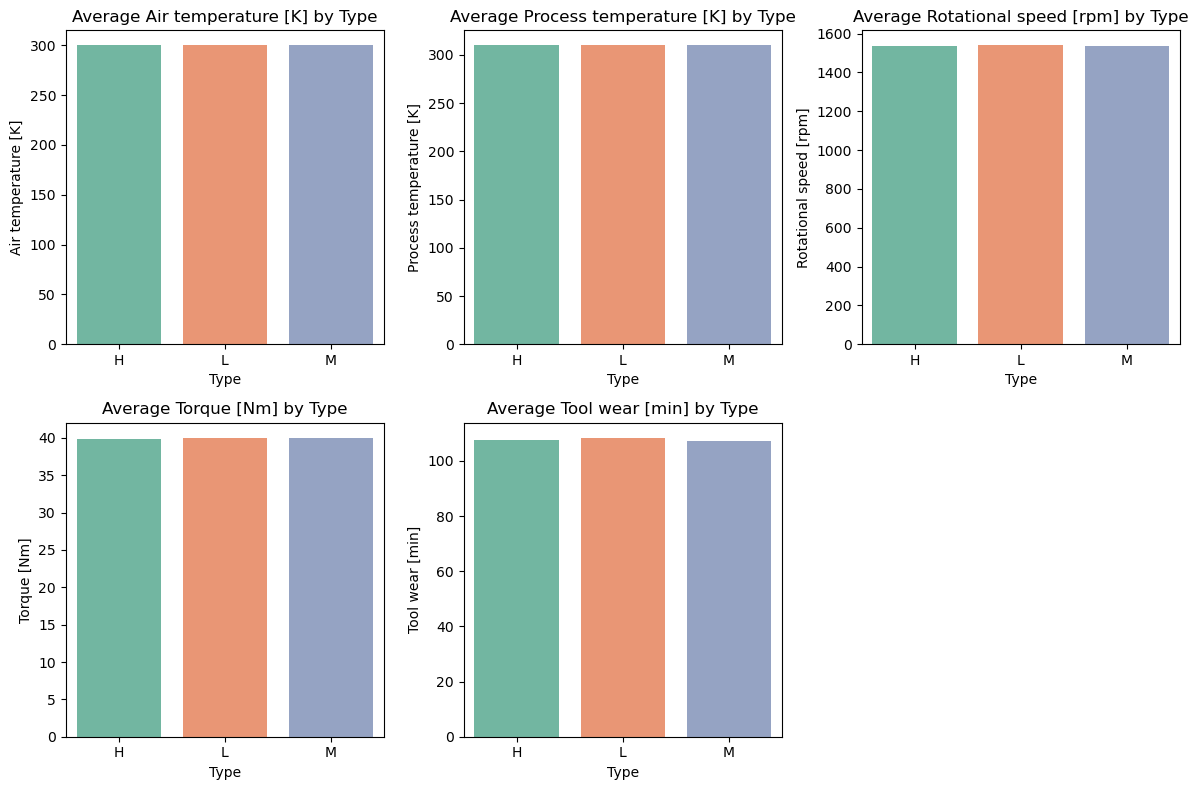

In [23]:

# Group by 'type' and calculate the mean of numeric columns
type_means = df.groupby("Type")[cols].mean().reset_index()

print(type_means)

# Plot barplots for each numeric feature
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x="Type", y=col, data=type_means, palette="Set2")
    plt.title(f"Average {col} by Type")

plt.tight_layout()
plt.show()

In [ ]:
# observation : type column is not informative or affect the model

C:\Users\Dell\AppData\Local\Temp\ipykernel_2376\3694477647.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette="Set2")


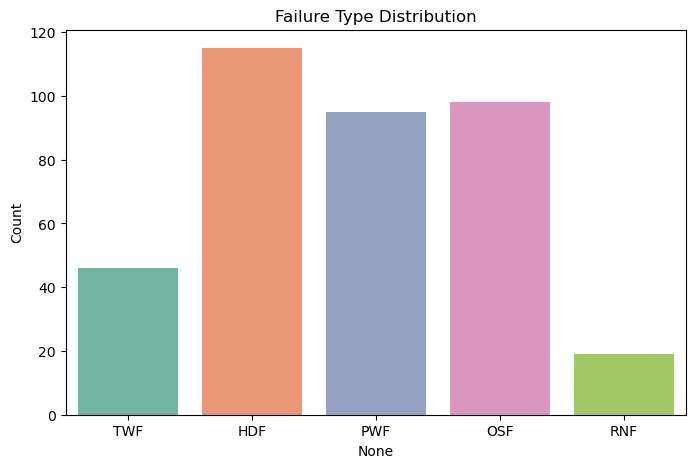

In [29]:
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

# Count how many failures of each type
failure_counts = df[failure_cols].sum()

# Plot barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette="Set2")
plt.ylabel("Count")
plt.title("Failure Type Distribution")
plt.show()


     Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
TWF           300.297826               310.165217             1566.173913   
HDF           302.560870               310.788696             1337.260870   
PWF           300.075789               309.954737             1763.968421   
OSF           300.044898               310.073469             1350.326531   
RNF           300.815789               310.763158             1485.000000   

     Torque [Nm]  Tool wear [min]  
TWF    37.836957       216.369565  
HDF    53.166957       107.191304  
PWF    48.514737       101.884211  
OSF    58.370408       207.693878  
RNF    43.673684       124.473684  


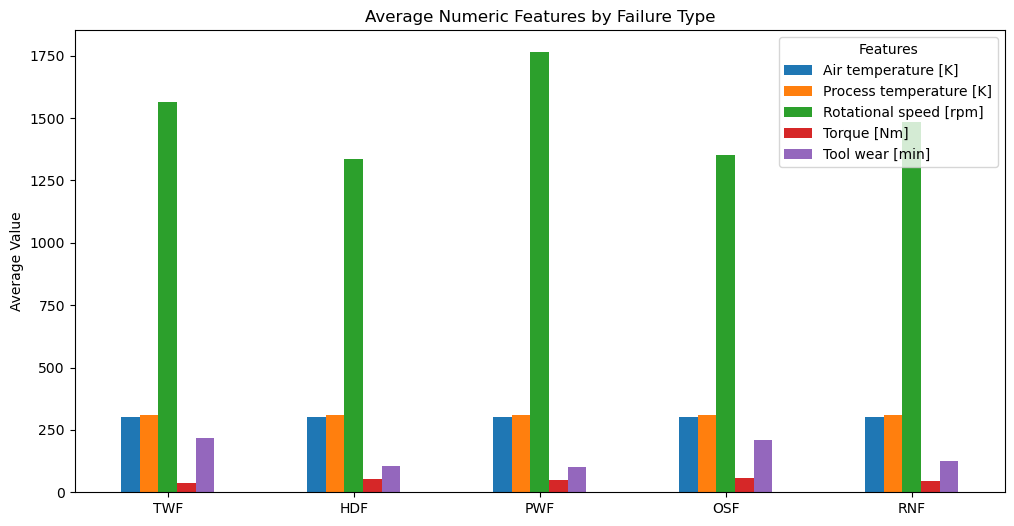

In [34]:
failure_means = {}
for failure in failure_cols:
    failure_means[failure] = df[df[failure] == 1][cols].mean()

# Convert dictionary to DataFrame
failure_means_df = pd.DataFrame(failure_means).T  # transpose so failures are rows

print(failure_means_df)

# Plot grouped barplot
failure_means_df.plot(kind="bar", figsize=(12, 6))
plt.ylabel("Average Value")
plt.title("Average Numeric Features by Failure Type")
plt.xticks(rotation=0)
plt.legend(title="Features")
plt.show()

In [ ]:
df["temp_diff"] = df["process_temperature"] - df["air_temperature"]
df["temp_ratio"] = df["process_temperature"] / df["air_temperature"]
df["power"] = df["torque"] * df["rotational_speed"]
# still not implemented

In [42]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
